이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [ ]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/tobigs/정규세션/3주차/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [ ]:
df.isnull().sum() # 결측치 없음

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# 중복 행 여부 확인 -> 없음
duplicates = df[df.duplicated()]
len(duplicates)

0

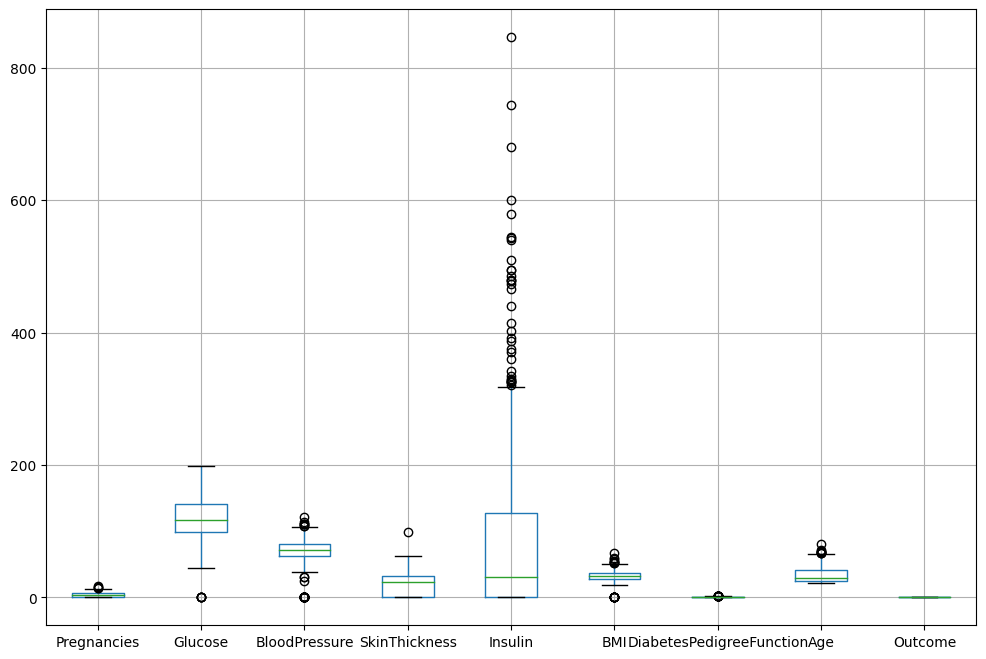

In [ ]:
# 이상치 여부 확인 - 박스플롯

plt.figure(figsize=(12, 8))
df.boxplot()
plt.show()

In [ ]:
# 라벨 비율 확인
label_counts = df['Outcome'].value_counts()
label_counts

,count
Outcome,
0,500
1,268


### 데이터 분할(train/valid/test)

In [ ]:
X = df.drop(columns='Outcome').values
y = df['Outcome'].values

# train : valid : test = 6 : 2 : 2 로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print('X_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print('X_test shape:', X_test.shape)

X_train shape: (460, 8)
X_valid shape: (154, 8)
X_test shape: (154, 8)


### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 오버샘플링 결과 확인
print("SMOTE 전")
print(np.unique(y_train, return_counts=True))
print(" ")
print("SMOTE 후")
print(np.unique(y_train_resampled, return_counts=True))

SMOTE 전
(array([0, 1]), array([299, 161]))
 
SMOTE 후
(array([0, 1]), array([299, 299]))


### 스케일링

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("X_train_pca shape:", X_train_pca.shape)
print("X_valid_pca shape:", X_valid_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

X_train_pca shape: (598, 6)
X_valid_pca shape: (154, 6)
X_test_pca shape: (154, 6)


## 3. KNN 구현 & 파라미터 튜닝


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=55, weights="distance")
knn_model.fit(X_train_pca, y_train_resampled)

KNeighborsClassifier(n_neighbors=55, weights='distance')

In [ ]:
# 하이퍼파라미터 튜닝을 위한 train, valid 평가

y_train_pred = knn_model.predict(X_train_pca)
y_valid_pred = knn_model.predict(X_valid_pca)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

print(f'train accuracy: {train_accuracy:.4f}')
print(f'valid accuracy: {valid_accuracy:.4f}')

train accuracy: 1.0000
valid accuracy: 0.7597


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
conf_matrix_valid

array([[73, 27],
       [10, 44]])

## 4. 평가

In [ ]:
y_test_pred = knn_model.predict(X_test_pca)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'test accuracy: {test_accuracy:.4f}')

test accuracy: 0.7532


---
# 2. K-Means 과제

## 1. 데이터 로드

In [ ]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/tobigs/정규세션/3주차/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:
# 결측치 확인

df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
# 전체가 결측치인 Column1,2,3,4 제거, ID 컬럼 제거
df_drop = df.drop(columns=["Column1", "Column2", "Column3", "Column4", "status_id"])
df_drop.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


### 범주형 컬럼 -> 수치형 컬럼으로 전환

In [ ]:
# status_type 매핑
unique_values = df_drop['status_type'].unique()
print(unique_values)

df_drop['status_type'] = df_drop['status_type'].map({'video': 0, 'photo': 1, 'link':2, 'status': 3})
df_drop.head()

['video' 'photo' 'link' 'status']


,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,0,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [ ]:
# status_published 날짜 형식 처리

df_drop['status_published'] = pd.to_datetime(df_drop['status_published'])

# 요일 추출 후 숫자로 변환 (월=0, 화=1, ... 일=6)
df_drop['weekday'] = df_drop['status_published'].dt.weekday
df_week = df_drop.drop(columns=['status_published']) # 기존 status_published 컬럼 삭제

df_week.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,weekday
0,0,529,512,262,432,92,3,1,1,0,6
1,1,150,0,0,150,0,0,0,0,0,5
2,0,227,236,57,204,21,1,1,0,0,5
3,1,111,0,0,111,0,0,0,0,0,5
4,1,213,0,0,204,9,0,0,0,0,2


### 컬럼별 분포 시각화

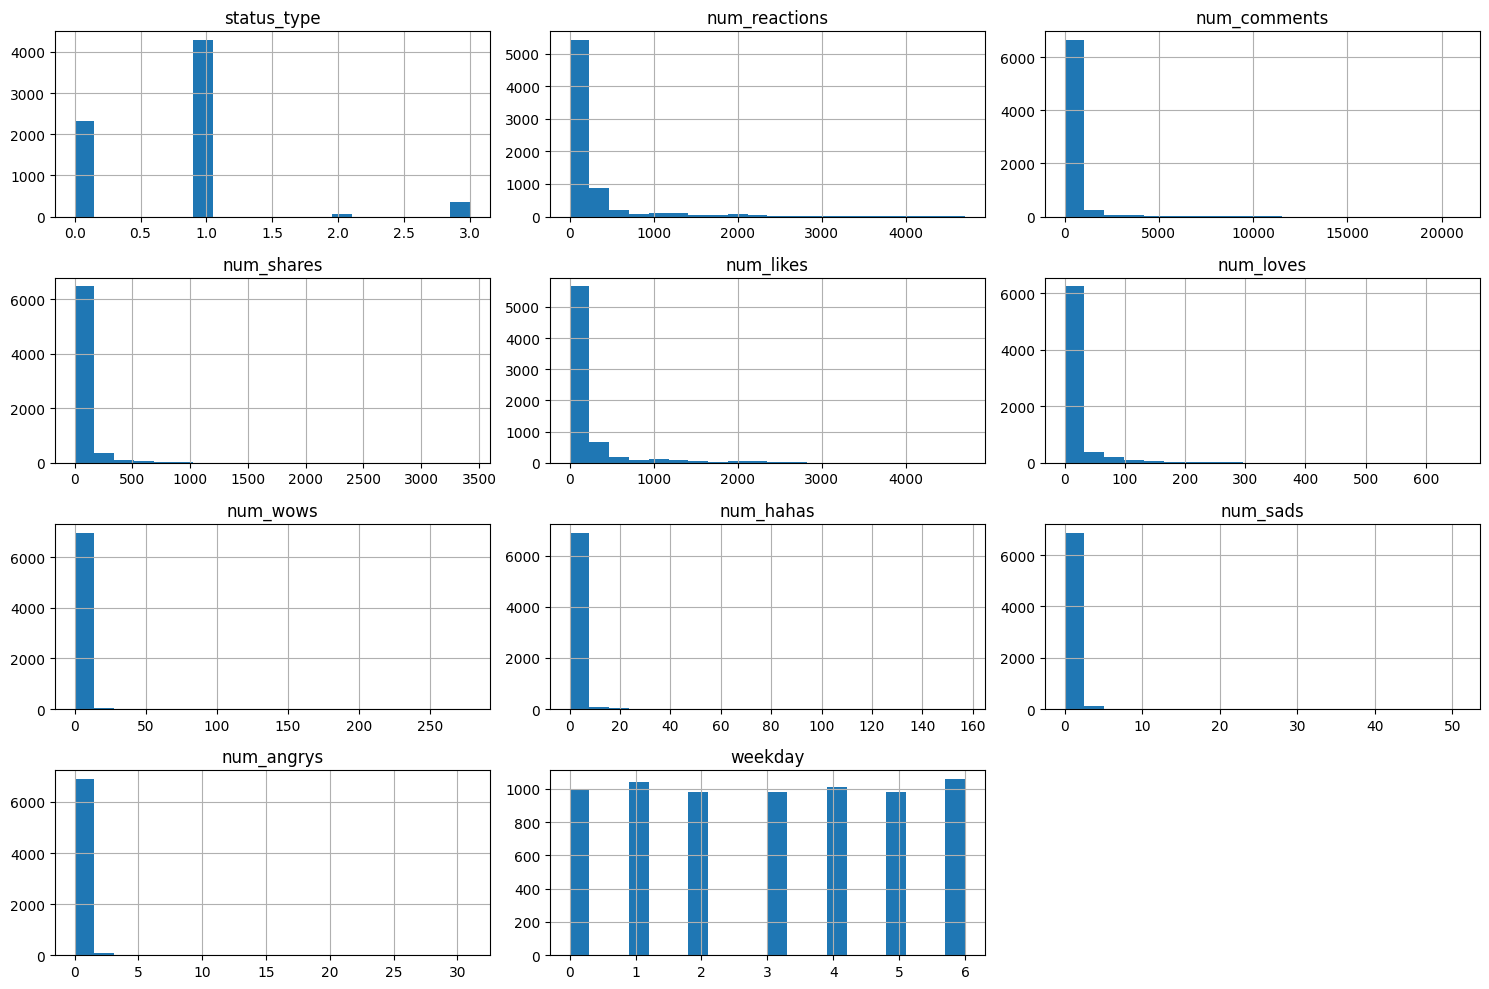

In [ ]:
df_week.hist(bins=20, figsize=(15, 10))

plt.tight_layout()
plt.show()

In [ ]:
#데이터 분포 변환

# 로그 변환
columns_to_log_transform = ['num_reactions', 'num_likes']
df_week[columns_to_log_transform] = df_week[columns_to_log_transform].apply(np.log1p)

# Yeo-Johnson 변환
from sklearn.preprocessing import PowerTransformer
columns_to_yeo_johnson  = ['num_comments', 'num_shares', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

pt = PowerTransformer(method='yeo-johnson')

for col in columns_to_yeo_johnson:
    df_week[[col]] = pt.fit_transform(df_week[[col]])



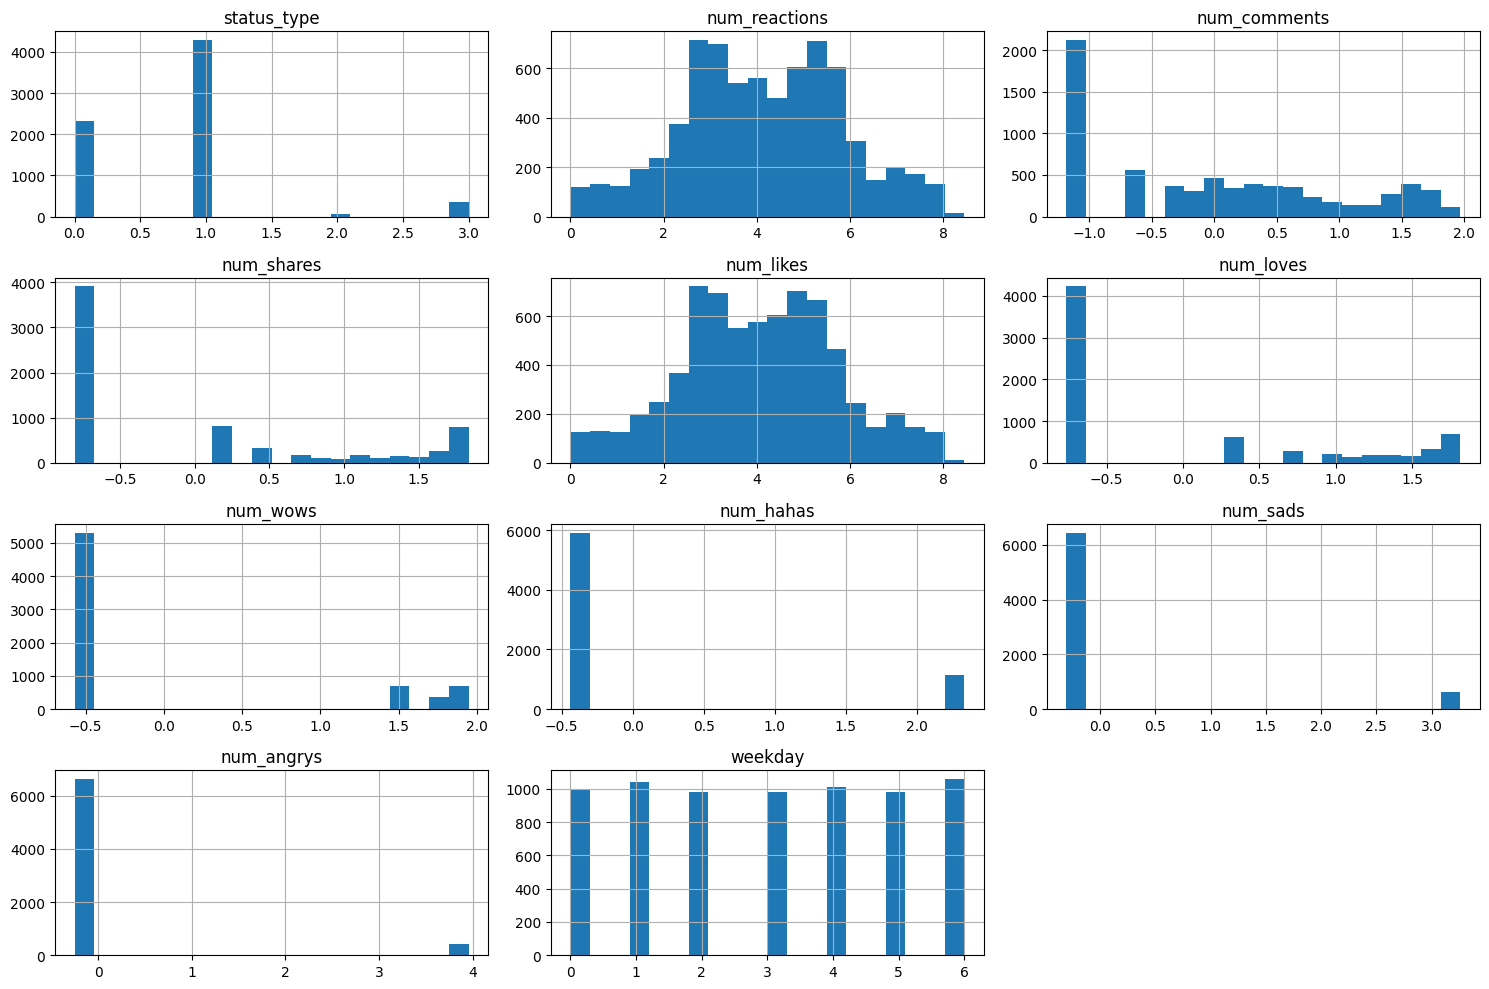

In [ ]:
df_week.hist(bins=20, figsize=(15, 10))

plt.tight_layout()
plt.show()

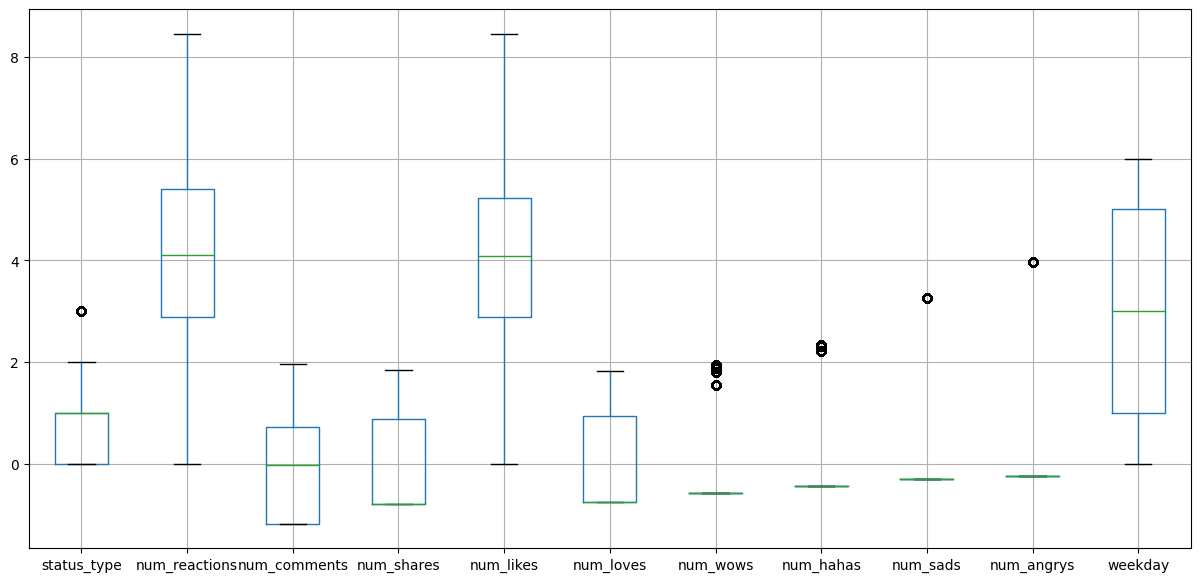

In [ ]:
df_week.boxplot(figsize=(15, 7))
plt.show()

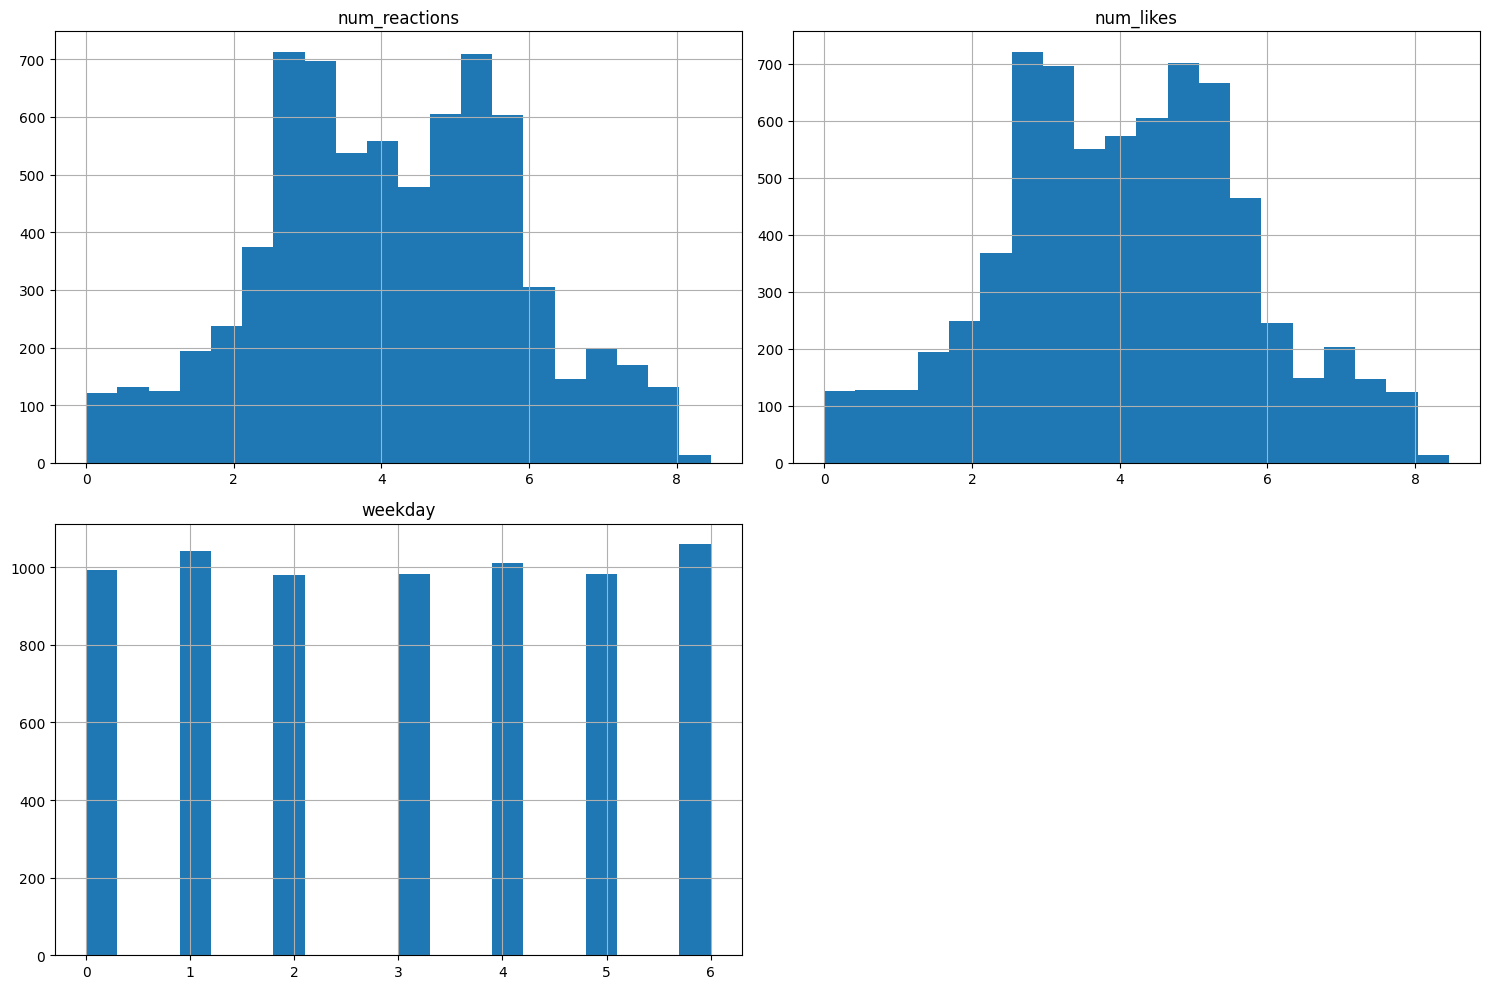

In [ ]:
# 분포에 치우침이 심한 컬럼 제거

df_skewdrop = df_week.drop(columns=['num_shares', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'num_comments', 'status_type'])

df_skewdrop.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# 넘파이 배열로 전환
live_data = df_skewdrop.values
live_data.shape

(7050, 3)

### 스케일링

In [ ]:
scaler2 = StandardScaler()
df_scaled = scaler.fit_transform(df_skewdrop)

## 3. K-Means 구현 & 파라미터 튜닝

### elbow methods로 클러스터 개수 결정

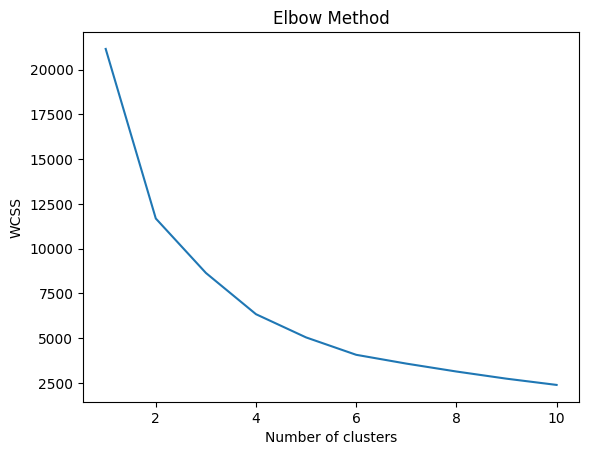

In [ ]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=6, init='random', random_state=42)

kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)

In [ ]:
kmeans2 = KMeans(n_clusters=6, init='k-means++', random_state=42)

kmeans2.fit(df_scaled)
clusters2 = kmeans2.predict(df_scaled)

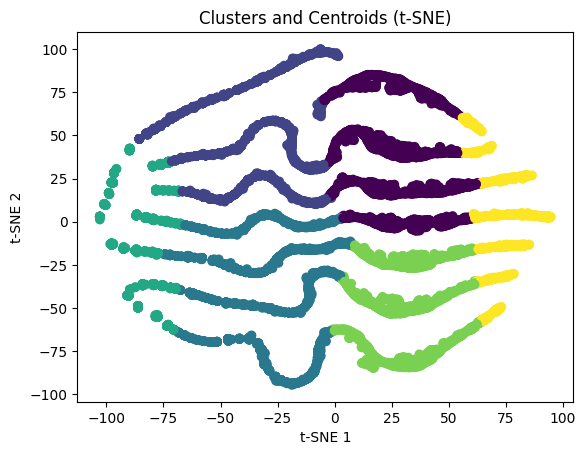

In [ ]:
from sklearn.manifold import TSNE

# t-SNE를 사용하여 2D로 축소
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# 2D 시각화
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters and Centroids (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

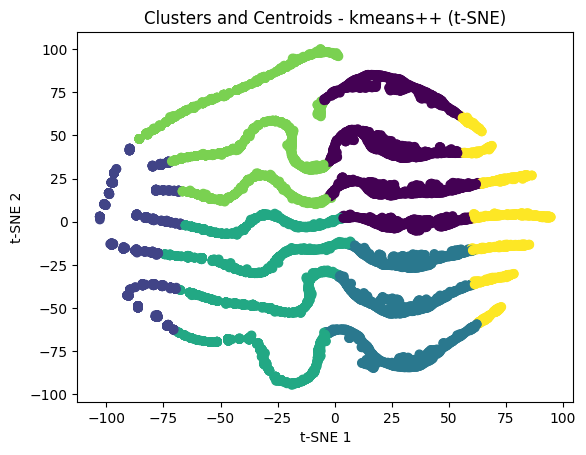

In [ ]:
from sklearn.manifold import TSNE

# t-SNE를 사용하여 2D로 축소
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# 2D 시각화
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=clusters2, cmap='viridis')
plt.title('Clusters and Centroids - kmeans++ (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## 4. 평가

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.3882


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, clusters2)
print(f'Silhouette Score(KMeans++): {silhouette_avg:.4f}')

Silhouette Score(KMeans++): 0.3876
